In [1]:
import numpy as np
import matplotlib.pyplot as plt
from neuralplot import ModelPlot
%matplotlib inline
%matplotlib notebook 

In [2]:
import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical

In [3]:
from sklearn.metrics import accuracy_score

In [4]:
from tensorflow.keras.datasets import cifar10

In [5]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [6]:
print("X_train shape:", X_train.shape)

X_train shape: (50000, 32, 32, 3)


In [7]:
print('y_train shape:', y_train.shape)

y_train shape: (50000, 1)


In [8]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


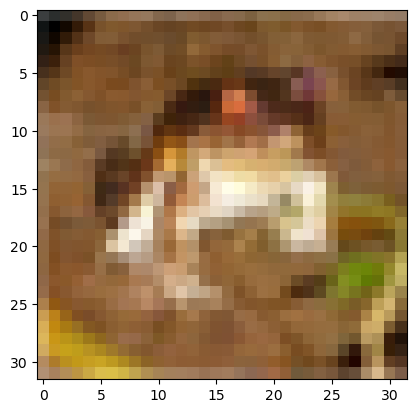

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
img = plt.imshow(X_train[0])

In [10]:
print('The label is:', y_train[0])    #frog

The label is: [6]


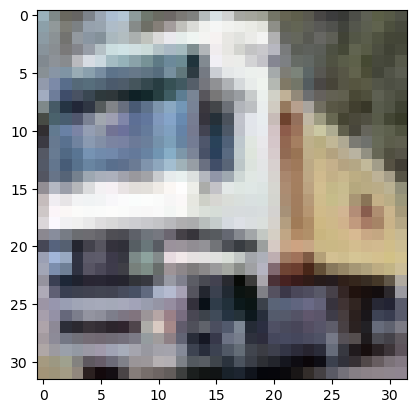

In [11]:
img = plt.imshow(X_train[1])  #truck

In [12]:
print('The label is:', y_train[1])

The label is: [9]


In [13]:
y_train_en=to_categorical(y_train,10) #one-hot_encoding
y_test_en=to_categorical(y_test,10) #10 = 10 different classes in the dataset

In [14]:
print('The one hot label is:', y_train_en[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [15]:
X_train=X_train/255
y_test=y_test/255      #normalization

In [16]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [26]:
model= Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [30]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [32]:
hist = model.fit(X_train, y_train_en, 
           batch_size=32, epochs=20, 
           validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 83s 64ms/step - loss: 1.5771 - accuracy: 0.4190 - val_loss: 1.3045 - val_accuracy: 0.5326
Epoch 2/20
1250/1250 [==============================] - 73s 59ms/step - loss: 1.1646 - accuracy: 0.5836 - val_loss: 0.9670 - val_accuracy: 0.6583
Epoch 3/20
1250/1250 [==============================] - 74s 59ms/step - loss: 0.9929 - accuracy: 0.6474 - val_loss: 0.9748 - val_accuracy: 0.6639
Epoch 4/20
1250/1250 [==============================] - 76s 61ms/step - loss: 0.8878 - accuracy: 0.6856 - val_loss: 0.8640 - val_accuracy: 0.6998
Epoch 5/20
1250/1250 [==============================] - 76s 61ms/step - loss: 0.8118 - accuracy: 0.7150 - val_loss: 0.7625 - val_accuracy: 0.7338
Epoch 6/20
1250/1250 [==============================] - 76s 61ms/step - loss: 0.7566 - accuracy: 0.7333 - val_loss: 0.7703 - val_accuracy: 0.7327
Epoch 7/20
1250/1250 [==============================] - 69s 56ms/step - loss: 0.7000 - accuracy: 0.7528 - val_loss: 0.7346 -

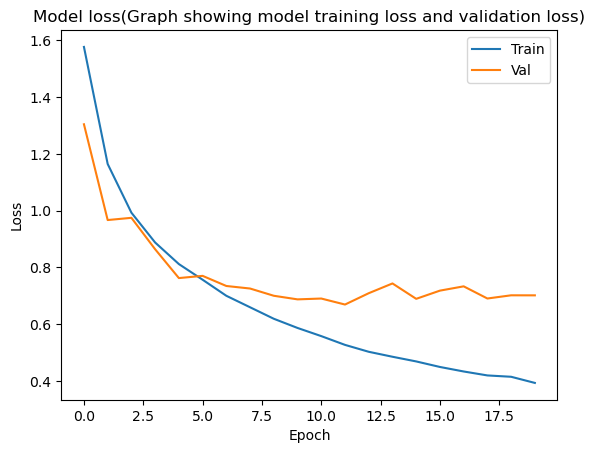

In [35]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss(Graph showing model training loss and validation loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

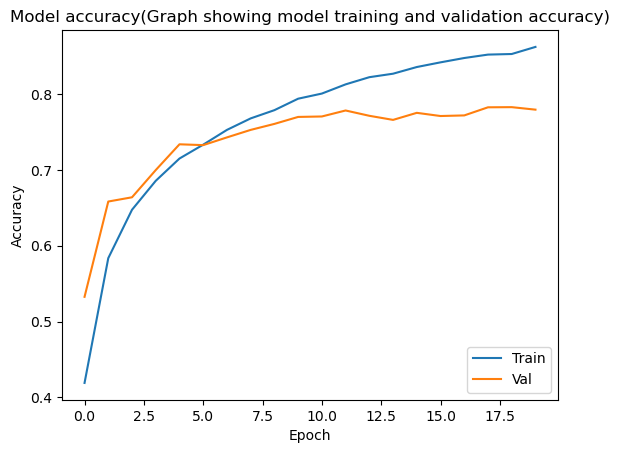

In [36]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy(Graph showing model training and validation accuracy)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

**Test accuracy**

In [ ]:
model.evaluate(X_test, y_test_en)

  1/313 [..............................] - ETA: 10s - loss: 137.4909 - accuracy: 0.5312